# 1. Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.utils import save_model, load_model
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value, plot_residual
from jcopml.automl import AutoRegressor

# 2. Importing Dataset

Information of Columns:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

In [2]:
df = pd.read_csv('data/house_price.csv', index_col= 'ID')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df = df.rename(columns= {'black': 'b'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [5]:
df.tax.unique()

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 329, 402, 348, 224, 277, 300, 330, 264, 223,
       254, 198, 285, 241, 293, 245, 289, 304, 287, 430, 422, 370, 351,
       280, 335, 411, 666, 711, 391, 273], dtype=int64)

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [7]:
df.shape

(333, 14)

# Dataset Splitting

In [8]:
X = df.drop(columns='medv', axis = 1) 
y = df.medv 

# Modeling

In [9]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [10]:
model = AutoRegressor(num_feature= ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 
                                    'rad', 'tax', 'ptratio', 'b', 'lstat'],
                     cat_feature= ['chas'])
                        

In [11]:
model.fit(X, y, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.6226179592928093
algo__gamma               | 9
algo__learning_rate       | 0.21232617602360485
algo__max_depth           | 2
algo__n_estimators        | 181
algo__reg_alpha           | 0.08759009842205835
algo__reg_lambda          | 0.062186565515225174
algo__subsample           | 0.7972287313054105

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.9821807659106522
Valid: 0.8384974393007368
Test : 0.9140813806236965


# View Results

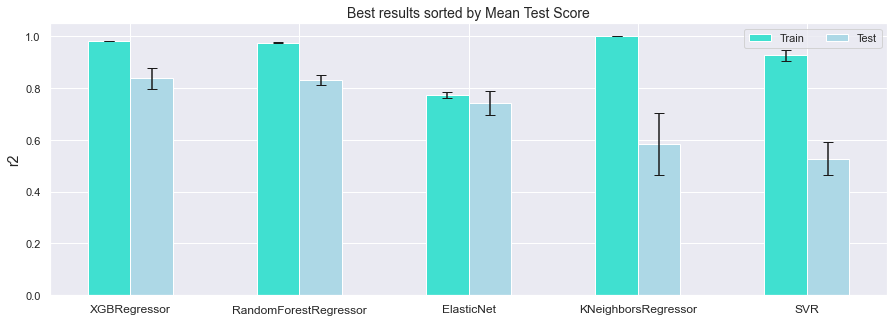

In [12]:
model.plot_results()

# Feature Importance

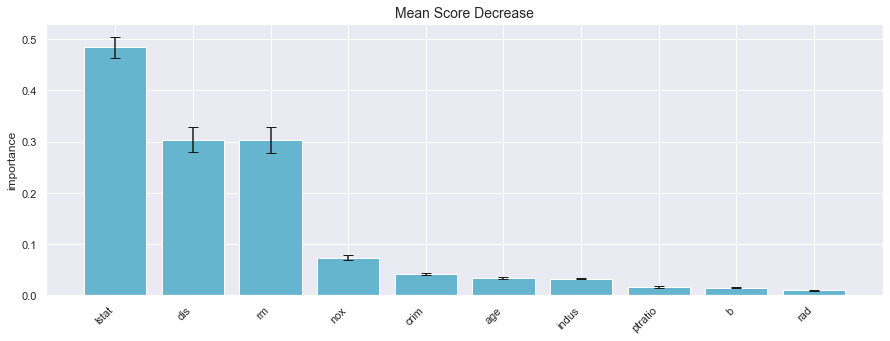

In [13]:
model.mean_score_decrease()

# Modeling

In [14]:
model = AutoRegressor(num_feature= ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 
                                    'rad', 'ptratio', 'b', 'lstat'],
                     cat_feature= ['chas'])

In [15]:
model.fit(X, y, cv = 5,algo = ['xgb'], n_trial= 150)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.7904694600380143
algo__gamma               | 5
algo__learning_rate       | 0.0911092882060569
algo__max_depth           | 8
algo__n_estimators        | 109
algo__reg_alpha           | 0.002327005128574086
algo__reg_lambda          | 0.022155515293358997
algo__subsample           | 0.5612595958172616

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=True, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.9928219527266574
Valid: 0.8410577495640196
Test : 0.9248194407129364


**`Note: This model being a benchmark to improve other models`**

# Save Model

In [16]:
model.save(fname= 'The_Boston_Housing_Price_Prediction_Baseline.pkl')

Model is pickled as model/The_Boston_Housing_Price_Prediction_Baseline.pkl
